# EDA

In [650]:
import pandas as pd 

In [651]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
training=pd.read_csv('training.csv')

In [652]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [653]:
train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [654]:
test.isnull().sum()

TweetId      0
TweetText    0
dtype: int64

In [655]:
train['Label'].value_counts()

Label
Sports      3325
Politics    3200
Name: count, dtype: int64

In [656]:
train.shape

(6525, 3)

In [657]:
def clean_column(train):
    train['TweetText'] = train['TweetText'].str.replace('.', '')
    train['TweetText'] = train['TweetText'].str.replace('!', '')
    train['TweetText'] = train['TweetText'].str.replace('?', '')
    train['TweetText'] = train['TweetText'].str.replace('(', '')
    train['TweetText'] = train['TweetText'].str.replace(')', '')
    train['TweetText'] = train['TweetText'].str.replace('-', '')
clean_column(train)

In [658]:
# Cleaning the tweets 
import re
def cleanTxt(text):
    text=re.sub('@[A-Za-z0–9]+','',text) #Removing @mentions
    text=re.sub('#', '', text) # Removing '#' hash tag
    text=re.sub('RT[\s]+', '', text) # Removing RT
    text=re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text=re.sub(':', '', text)
    text=re.sub("'", '', text)
    text=re.sub(",", '', text)
    return text
train['TweetText']=train['TweetText'].apply(cleanTxt)

In [659]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,SecKerry The value of the and is measured no...
1,304834304222064640,Politics,1481 I fear so
2,303568995880144898,Sports,Watch video highlights of the wwc13 final betw...
3,304366580664528896,Sports,At Nitro Circus at AlbertPark theymakeitlook...
4,296770931098009601,Sports,Always a good thing Thanks for the feedback


In [660]:
def tolist(x):
    return x.split(' ')
train['TweetText']=train['TweetText'].apply(tolist)
train['TweetText'].astype(str)

0       ['SecKerry', 'The', 'value', 'of', 'the', '', ...
1                             ['1481', 'I', 'fear', 'so']
2       ['Watch', 'video', 'highlights', 'of', 'the', ...
3       ['', 'At', 'Nitro', 'Circus', 'at', 'AlbertPar...
4       ['', 'Always', 'a', 'good', 'thing', 'Thanks',...
                              ...                        
6520    ['Photo', 'PM', 'has', 'laid', 'a', 'wreath', ...
6521    ['The', 'secret', 'of', 'the', 'Chennai', 'pit...
6522        ['', 'he', 'isnt', 'on', 'Twitter', 'either']
6523    ['Which', 'England', 'player', 'would', 'you',...
6524    ['Dmitry', 'Medvedev', 'expressed', 'condolenc...
Name: TweetText, Length: 6525, dtype: object

In [661]:
#remove null strings 
def remove_empty(x):
    return [item for item in x if item != '']
train['TweetText']=train['TweetText'].apply(remove_empty)
# remove . from string in list of strings in train 


In [662]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,"[SecKerry, The, value, of, the, and, is, measu..."
1,304834304222064640,Politics,"[1481, I, fear, so]"
2,303568995880144898,Sports,"[Watch, video, highlights, of, the, wwc13, fin..."
3,304366580664528896,Sports,"[At, Nitro, Circus, at, AlbertPark, theymakeit..."
4,296770931098009601,Sports,"[Always, a, good, thing, Thanks, for, the, fee..."


In [663]:
# words occurences for each Label
from collections import Counter
def word_count(data):
    freqs = {}
    for i in range(data.shape[0]) :
        label = data['Label'][i]
        for word in  data['TweetText'][i]:
            pair = ((word,label))
            if pair in freqs :
                freqs[pair] += 1
            else :
                freqs[pair] = 1
    return freqs
word_count(train)
# same function as above but return word its label and count 
df=pd.DataFrame.from_dict(word_count(train), orient='index', columns=['count'])
df.reset_index(inplace=True)
df[['word','label']] = pd.DataFrame(df['index'].tolist(), index=df.index)
df.drop(columns=['index'], inplace=True)
df.head()

,count,word,label
0,51,SecKerry,Politics
1,275,The,Politics
2,6,value,Politics
3,1277,of,Politics
4,1881,the,Politics


In [664]:
# sort on count 
df.sort_values(by=['count'], ascending=False, inplace=True)
df.head()

,count,word,label
25,1943,the,Sports
4,1881,the,Politics
3,1277,of,Politics
58,1276,to,Politics
103,1224,to,Sports


In [665]:
# reset index
df.reset_index(inplace=True)

In [666]:
df.drop(columns=['index'], inplace=True)
df.head()

,count,word,label
0,1943,the,Sports
1,1881,the,Politics
2,1277,of,Politics
3,1276,to,Politics
4,1224,to,Sports


In [667]:
# weights columns for each word 
df['weights']=df['count']/df.groupby('label')['count'].transform('sum')
df.head()

,count,word,label,weights
0,1943,the,Sports,0.038628
1,1881,the,Politics,0.038592
2,1277,of,Politics,0.026200
3,1276,to,Politics,0.026179
4,1224,to,Sports,0.024334


In [668]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


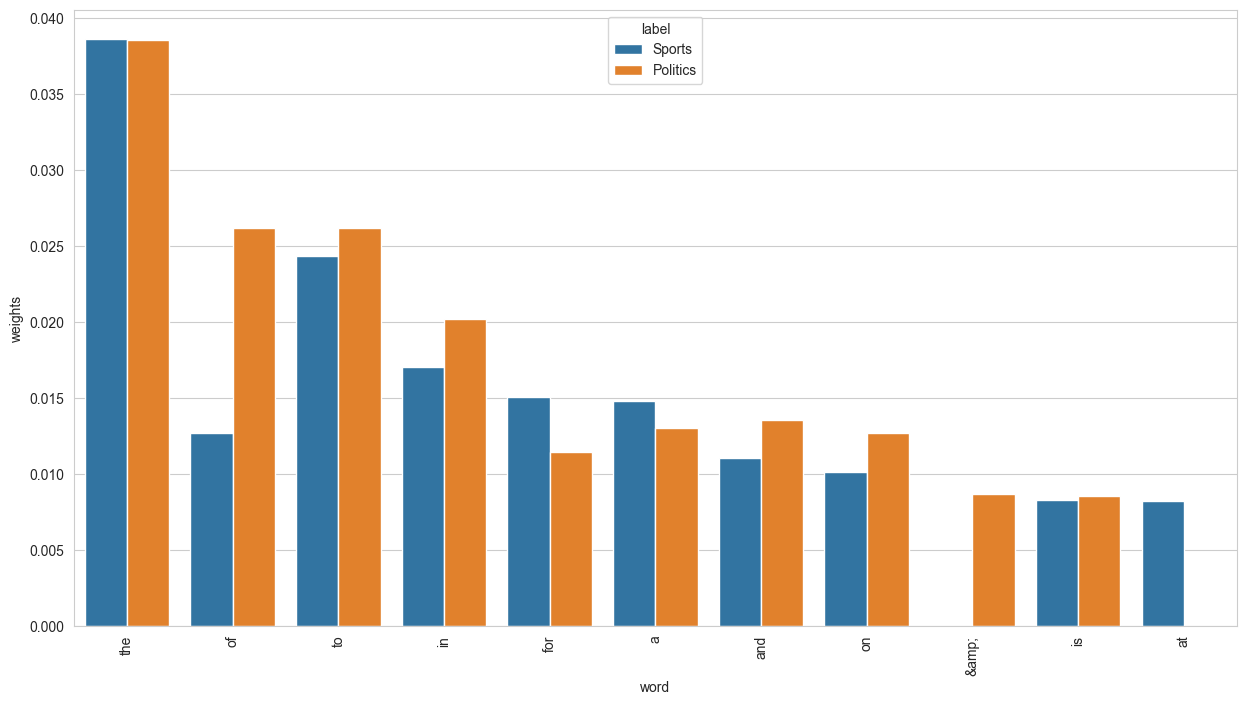

In [669]:
# plotting the weights
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='word', y='weights', hue='label', data=df.head(20))
plt.xticks(rotation=90)
plt.show()

In [670]:
# lowercase all words in train
def lower_case(data):
    for i in range(data.shape[0]) :
        data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
    return data
lower_case(train)

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_29252\1933219485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_29252\1933219485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_29252\1933219485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,TweetId,Label,TweetText
0,304271250237304833,Politics,"[seckerry, the, value, of, the, and, is, measu..."
1,304834304222064640,Politics,"[1481, i, fear, so]"
2,303568995880144898,Sports,"[watch, video, highlights, of, the, wwc13, fin..."
3,304366580664528896,Sports,"[at, nitro, circus, at, albertpark, theymakeit..."
4,296770931098009601,Sports,"[always, a, good, thing, thanks, for, the, fee..."
...,...,...,...
6520,296675082267410433,Politics,"[photo, pm, has, laid, a, wreath, at, martyrs,..."
6521,306677536195231746,Sports,"[the, secret, of, the, chennai, pitch, crumbli..."
6522,306451295307431937,Sports,"[he, isnt, on, twitter, either]"
6523,306088574221176832,Sports,"[which, england, player, would, you, take, out..."


In [671]:
# removing stop words and update the weights
def remove_stopwords(data):
    stop_words = ['a', 'an', 'the','is', 'and', 'or', 'but','the', 'if', 'then', 'thus', 'hence', 'so', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']
    for i in range(data.shape[0]) :
        for word in  stop_words:
            if word in data['TweetText'][i]:
                data['TweetText'][i].remove(word)
    return data
train=remove_stopwords(train)

In [672]:
word_count(train)
# same function as above but return word its label and count 
df1=pd.DataFrame.from_dict(word_count(train), orient='index', columns=['count'])


In [673]:
df1.head()

,count
"(seckerry, Politics)",51
"(value, Politics)",6
"(measured, Politics)",2
"(dollars, Politics)",7
"(in, Politics)",112


In [675]:
df1.reset_index(inplace=True)
df1[['word','label']] = pd.DataFrame(df1['index'].tolist(), index=df1.index)
df1.drop(columns=['index'], inplace=True)
df1.head()

,count,word,label
0,51,seckerry,Politics
1,6,value,Politics
2,2,measured,Politics
3,7,dollars,Politics
4,112,in,Politics


In [676]:
df1.sort_values(by=['count'], ascending=False, inplace=True)
df1.head()

,count,word,label
741,422,&amp;,Politics
71,347,indvaus,Sports
117,327,president,Politics
59,314,test,Sports
85,312,you,Sports


In [677]:
df1.reset_index(inplace=True)
df1.drop(columns=['index'], inplace=True)
df1.head()

,count,word,label
0,422,&amp;,Politics
1,347,indvaus,Sports
2,327,president,Politics
3,314,test,Sports
4,312,you,Sports


In [678]:
df1['weights']=df1['count']/df1.groupby('label')['count'].transform('sum')
df1.head()

,count,word,label,weights
0,422,&amp;,Politics,0.011396
1,347,indvaus,Sports,0.009004
2,327,president,Politics,0.008831
3,314,test,Sports,0.008147
4,312,you,Sports,0.008095


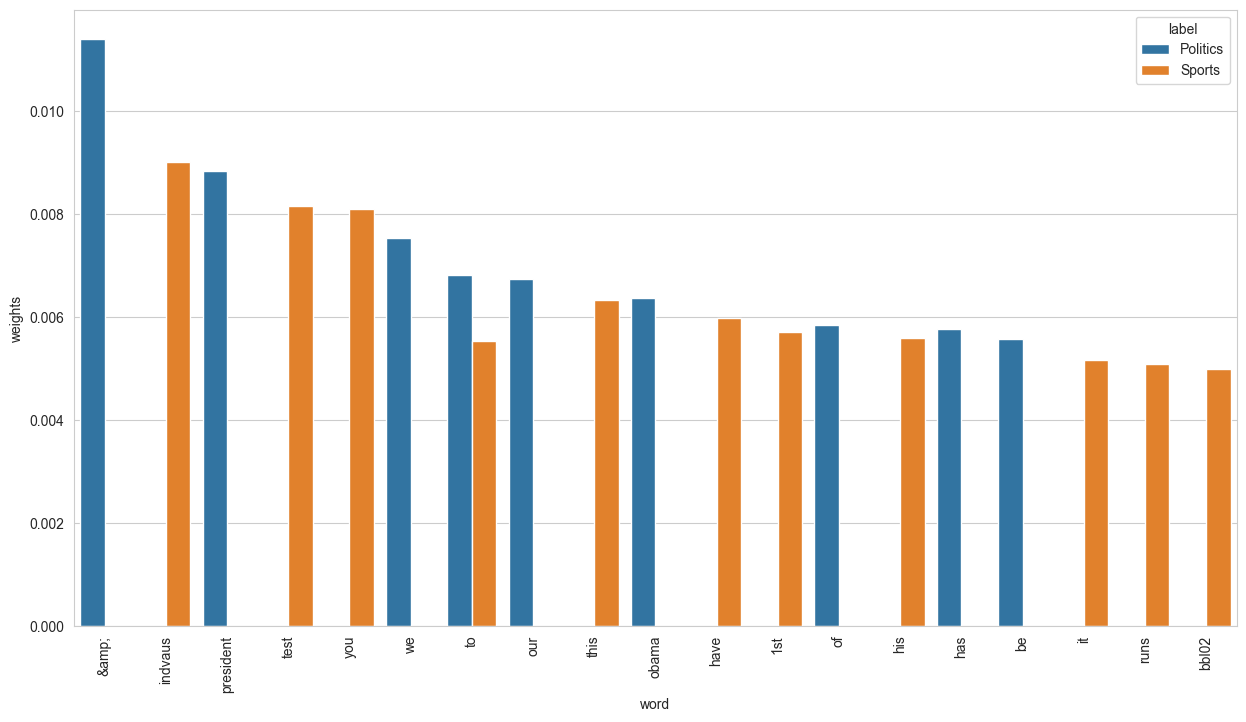

In [679]:
#plot the weights
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='word', y='weights', hue='label', data=df1.head(20))
plt.xticks(rotation=90)
plt.show()